In [623]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [624]:
train_path = 'drive/MyDrive/Deep Learning/HW6/train.csv'
test_path = 'drive/MyDrive/Deep Learning/HW6/test.csv'

train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [625]:
train_set.head()

time      value
0     0  52.483570
1     1  49.352749
2     2  53.314735
3     3  57.711823
4     4  48.934444

In [626]:
train = train_set['value']
test = test_set['value']
train.index = train_set['time']
train.head()
test.index = test_set['time']
test.head()
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [627]:
train.head()

value
time           
0     52.483570
1     49.352749
2     53.314735
3     57.711823
4     48.934444

In [628]:
print(train.shape, test.shape)

(1000, 1) (461, 1)


In [629]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)


In [630]:
from keras.preprocessing.sequence import TimeseriesGenerator

train_data_gen = TimeseriesGenerator(train_sc, train_sc,
	length=20, sampling_rate=1,stride=1,
    batch_size=10)
test_data_gen = TimeseriesGenerator(test_sc, test_sc,
	length=20, sampling_rate=1,stride=1,
	batch_size=1)

In [631]:
# model = keras.Sequential([
#   keras.layers.Input(shape=(20, 1)),
#   keras.layers.SimpleRNN(32, return_sequences=True),

#   keras.layers.SimpleRNN(64),
#   # keras.layers.Flatten(),

#   keras.layers.Dense(128),
#   keras.layers.Dense(1)
# ])
inputs = keras.layers.Input(shape=(20, 1))
rnn_out = keras.layers.SimpleRNN(100)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=keras.losses.MeanAbsoluteError())
model.summary()

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
simple_rnn_97 (SimpleRNN)    (None, 100)               10200     
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [632]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
history = model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_test,
    callbacks=[es_callback],
)

Epoch 1/100
96/96 [==============================] - 2s 12ms/step - loss: 0.5421 - val_loss: 0.3382
Epoch 2/100
96/96 [==============================] - 1s 11ms/step - loss: 0.3145 - val_loss: 0.3323
Epoch 3/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2674 - val_loss: 0.2928
Epoch 4/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2483 - val_loss: 0.2830
Epoch 5/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2490 - val_loss: 0.2900
Epoch 6/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2465 - val_loss: 0.2941
Epoch 7/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2479 - val_loss: 0.2745
Epoch 8/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2437 - val_loss: 0.2762
Epoch 9/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2450 - val_loss: 0.2708
Epoch 10/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2433 - val_loss: 0.2636

In [633]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(train_data_gen)))

98/98 [==============================] - 0s 2ms/step - loss: 0.2408
mean absolute error: 0.24077846109867096


In [634]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(test_data_gen)))

441/441 [==============================] - 1s 2ms/step - loss: 0.2721
mean absolute error: 0.2720963954925537


In [635]:
pred = scaler.inverse_transform(model.predict(test_data_gen))

In [636]:
pred.shape
true = np.array(test[20:]).reshape(-1,1)

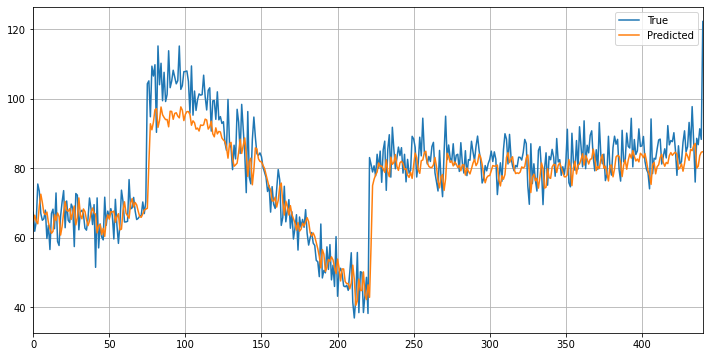

In [637]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(true, label= 'True')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()

In [638]:
from keras.preprocessing.sequence import TimeseriesGenerator

train_data_gen = TimeseriesGenerator(train_sc, train_sc,
	length=40, sampling_rate=1,stride=1,
    batch_size=10)
test_data_gen = TimeseriesGenerator(test_sc, test_sc,
	length=40, sampling_rate=1,stride=1,
	batch_size=1)

In [639]:
# model = keras.Sequential([
#   keras.layers.Input(shape=(20, 1)),
#   keras.layers.SimpleRNN(32, return_sequences=True),

#   keras.layers.SimpleRNN(64),
#   # keras.layers.Flatten(),

#   keras.layers.Dense(128),
#   keras.layers.Dense(1)
# ])
inputs = keras.layers.Input(shape=(None, 1))
rnn_out = keras.layers.SimpleRNN(100)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=keras.losses.MeanAbsoluteError())
model.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_67 (InputLayer)        [(None, None, 1)]         0         
_________________________________________________________________
simple_rnn_98 (SimpleRNN)    (None, 100)               10200     
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [640]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
history = model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_test,
    callbacks=[es_callback],
)

Epoch 1/100
96/96 [==============================] - 2s 12ms/step - loss: 0.4785 - val_loss: 0.2927
Epoch 2/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2810 - val_loss: 0.3082
Epoch 3/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2623 - val_loss: 0.2684
Epoch 4/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2519 - val_loss: 0.2770
Epoch 5/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2520 - val_loss: 0.2627
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2490 - val_loss: 0.2905
Epoch 7/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2491 - val_loss: 0.2747
Epoch 8/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2491 - val_loss: 0.2626
Epoch 9/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2524 - val_loss: 0.2664
Epoch 10/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2472 - val_loss: 0.2760

In [641]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(train_data_gen)))

96/96 [==============================] - 0s 3ms/step - loss: 0.2476
mean absolute error: 0.247572660446167


In [642]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(test_data_gen)))

421/421 [==============================] - 1s 2ms/step - loss: 0.2673
mean absolute error: 0.2673344612121582


In [643]:
pred = scaler.inverse_transform(model.predict(test_data_gen))

In [644]:
pred.shape
true = np.array(test[40:]).reshape(-1,1)

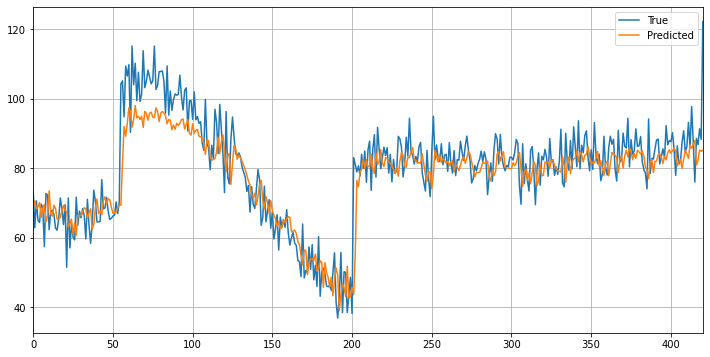

In [645]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(true, label= 'True')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()